In [21]:
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [33]:
from os.path import join

import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
flip = pd.read_csv(join('_data', 'flip.csv'))
flip = flip['x'].values

N = len(flip)

In [27]:
nIter = 1000
nChains = 4
nWarmup = 1000

In [34]:
# model
with pm.Model() as model:
    theta = pm.Uniform('theta', 0, 1)
    p_flip = pm.Bernoulli('pflip', theta, observed=flip)
    
    trace = pm.sample(nIter, tune=nWarmup, cores=4, chains=nChains,
             random_seed=1450154626, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.


#### Diagnostics

In [37]:
with model:
    print(pm.summary(trace).round(2))

       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.73  0.09    0.55     0.89        0.0      0.0    1826.0    2492.0   

       r_hat  
theta    1.0  


In [35]:
btrace4plot = trace['posterior']['theta'].data
btrace4plot = btrace4plot.swapaxes(1, 0)

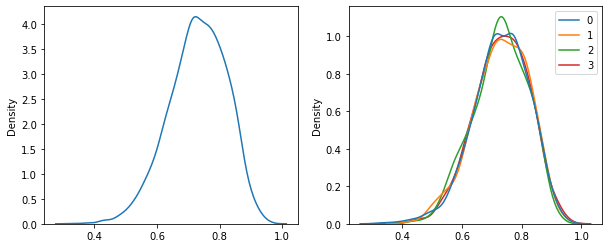

In [36]:
# diagnostics - density
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot(data=btrace4plot.reshape(-1), ax=axes[0])
sns.kdeplot(data=btrace4plot, ax=axes[1])
plt.show()